<a href="https://colab.research.google.com/github/RafaelCaballero/Julio24/blob/main/code/06ejemplodataframesCompletado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la ciencia de datos con Python
###  Rafa Caballero

# Caso práctico: análisis básico de datos, gráficos con pandas

Comenzando cargando y preparando los datos con los que vamos a trabajar

In [ ]:
import yfinance as yf
import pandas as pd

# Lista de tickers:
valores = ["inditex","iberdrola", "santander", "BBVA", "naturgy"]
tickers = ['ITX.MC', 'IBE.MC',    'SAN.MC', 'BBVA.MC', 'NTGY.MC']

# Fechas de inicio y fin
start_date = '2024-01-01'
end_date = '2024-07-02'

# Descargar los datos de Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Crear un DataFrame vacío para almacenar los valores OPEN
open_data = pd.DataFrame()

# Extraer los valores OPEN de cada ticker y añadirlos al DataFrame
for i,ticker in enumerate(tickers):
    open_data[valores[i]] = data[ticker]['Open']


# incremento en porcentaje con respecto al día anterior
#
roi = open_data.pct_change()*100

# añadimos el día de la semana
roi['dia_semana'] = roi.index.to_series().dt.day_name()

# mejor en castellano
days_translation = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
roi['dia_semana'] = roi['dia_semana'].map(days_translation)

# Establecer el índice como una versión formateada de la fecha
roi.index = pd.to_datetime(open_data.index).strftime('%Y-%m-%d')


roi.style.background_gradient(cmap='RdYlGn')

[*********************100%%**********************]  5 of 5 completed


,inditex,iberdrola,santander,BBVA,naturgy,dia_semana
Date,,,,,,
2024-01-02,nan,nan,nan,nan,nan,Martes
2024-01-03,-1.613308,-0.624998,2.110816,2.173917,-0.296296,Miércoles
2024-01-04,-2.792724,-0.335429,-1.782940,-1.323883,-0.445768,Jueves
2024-01-05,-0.658935,0.546904,1.525910,1.102061,0.597014,Viernes
2024-01-08,-0.212253,0.334728,1.062455,0.710905,-0.074179,Lunes
2024-01-09,1.356018,-2.085071,0.576918,0.329410,0.371197,Martes
2024-01-10,-0.367260,-0.766611,-1.363924,-1.454029,-0.443790,Miércoles
2024-01-11,1.369143,0.000000,0.284315,0.594957,0.297177,Jueves
2024-01-12,-0.857148,-0.643775,-1.945877,-1.656025,-0.370372,Viernes


In [ ]:
data

Ticker      SAN.MC                                             BBVA.MC         \
Price         Open    High     Low   Close Adj Close    Volume    Open   High   
Date                                                                            
2024-01-02  3.7900  3.8900  3.7895  3.8535  3.778027  33031875   8.280  8.482   
2024-01-03  3.8700  3.8800  3.7890  3.7995  3.725085  25083126   8.460  8.500   
2024-01-04  3.8010  3.8825  3.8010  3.8800  3.804008  22951596   8.348  8.472   
2024-01-05  3.8590  3.9395  3.8420  3.9125  3.835871  30772699   8.440  8.554   
2024-01-08  3.9000  3.9400  3.8705  3.9295  3.852538  19616790   8.500  8.628   
...            ...     ...     ...     ...       ...       ...     ...    ...   
2024-06-25  4.4265  4.4400  4.3515  4.3805  4.380500  28121040   9.448  9.480   
2024-06-26  4.3955  4.4070  4.3200  4.3445  4.344500  19041974   9.290  9.360   
2024-06-27  4.3500  4.3515  4.3055  4.3370  4.337000  23526706   9.216  9.284   
2024-06-28  4.3575  4.3680  4.2960  4.3305  4.330500  23910256   9.320  9.364   
2024-07-01  4.4030  4.4650  4.3770  4.4475  4.447500  27889082   9.528  9.624   

Ticker                    ...  IBE.MC                                 NTGY.MC  \
Price         Low  Close  ...     Low   Close  Adj Close    Volume       Open   
Date                      ...                                                   
2024-01-02  8.272  8.426  ...  11.810  11.875  11.675021  12175208  27.000000   
2024-01-03  8.300  8.320  ...  11.825  11.835  11.635695  10708600  26.920000   
2024-01-04  8.336  8.460  ...  11.885  12.030  11.827411  17462323  26.799999   
2024-01-05  8.370  8.514  ...  11.885  12.035  11.832326  10171410  26.959999   
2024-01-08  8.446  8.602  ...  11.960  11.995  11.793000  14466437  26.940001   
...           ...    ...  ...     ...     ...        ...       ...        ...   
2024-06-25  9.224  9.280  ...  12.330  12.450  12.450000  18690584  20.920000   
2024-06-26  9.108  9.200  ...  12.215  12.295  12.295000  18048805  20.719999   
2024-06-27  9.150  9.240  ...  12.115  12.150  12.150000  12599151  20.680000   
2024-06-28  9.220  9.352  ...  12.070  12.115  12.115000  12184404  20.299999   
2024-07-01  9.434  9.500  ...  12.200  12.320  12.320000  11241084  20.360001   

Ticker                                                          
Price            High        Low      Close  Adj Close  Volume  
Date                                                            
2024-01-02  27.180000  26.860001  27.020000  26.495850  354143  
2024-01-03  27.100000  26.639999  26.760000  26.240892  490915  
2024-01-04  27.100000  26.799999  27.100000  26.574297  601158  
2024-01-05  27.120001  26.820000  27.059999  26.535072  276531  
2024-01-08  27.080000  26.799999  27.040001  26.515463  202302  
...               ...        ...        ...        ...     ...  
2024-06-25  21.160000  20.620001  20.719999  20.719999  516569  
2024-06-26  20.900000  20.600000  20.639999  20.639999  330351  
2024-06-27  20.719999  20.260000  20.320000  20.320000  490679  
2024-06-28  20.459999  20.160000  20.160000  20.160000  623709  
2024-07-01  20.700001  20.299999  20.680000  20.680000  456892  

[127 rows x 30 columns]

**Ejercicio**

La primera fila tiene valores NaN porque no existe fila anterior. Generar un nuevo dataframe "roi2" que sea igual que "roi" pero quitando la primera fila (idea: usar `roi.iloc[fila]` para seleccionar todo menos la primera fila)

In [ ]:
# solución

roi2 = roi.iloc[1:]
# para probar
roi2.style.background_gradient(cmap='RdYlGn')

,inditex,iberdrola,santander,BBVA,naturgy,dia_semana
Date,,,,,,
2024-01-03,-1.613308,-0.624998,2.110816,2.173917,-0.296296,Miércoles
2024-01-04,-2.792724,-0.335429,-1.782940,-1.323883,-0.445768,Jueves
2024-01-05,-0.658935,0.546904,1.525910,1.102061,0.597014,Viernes
2024-01-08,-0.212253,0.334728,1.062455,0.710905,-0.074179,Lunes
2024-01-09,1.356018,-2.085071,0.576918,0.329410,0.371197,Martes
2024-01-10,-0.367260,-0.766611,-1.363924,-1.454029,-0.443790,Miércoles
2024-01-11,1.369143,0.000000,0.284315,0.594957,0.297177,Jueves
2024-01-12,-0.857148,-0.643775,-1.945877,-1.656025,-0.370372,Viernes
2024-01-15,2.148293,0.561560,-0.617695,-0.529224,0.669146,Lunes


**Ejercicio**

Queremos obtener el valor de BBVA el 2024-06-28 (ayuda: utilizar `roi2.loc[fila,columna]`)

In [ ]:
x = roi2.loc["2024-06-28","BBVA"]
x

1.1284732642112605

**Ejercicio**

¿Y si queremos mostrar toda la fila correspondiente a esta fecha?

In [ ]:
roi2.loc[ ["2024-06-28"] ]

,inditex,iberdrola,santander,BBVA,naturgy,dia_semana
Date,,,,,,
2024-06-28,1.015121,-1.624034,0.172418,1.128473,-1.837529,Viernes


### Información básica

In [ ]:
roi2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 2024-01-03 to 2024-07-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inditex     126 non-null    float64
 1   iberdrola   126 non-null    float64
 2   santander   126 non-null    float64
 3   BBVA        126 non-null    float64
 4   naturgy     126 non-null    float64
 5   dia_semana  126 non-null    object 
dtypes: float64(5), object(1)
memory usage: 11.0+ KB


NoneType

In [ ]:
datos = roi2.describe()
datos.to_excel("resumen.xlsx")

In [ ]:
print(datos)

          inditex   iberdrola   santander        BBVA     naturgy
count  126.000000  126.000000  126.000000  126.000000  126.000000
mean     0.141687    0.017950    0.128808    0.128017   -0.207871
std      1.343640    0.986316    1.402039    1.817266    1.777754
min     -2.888334   -2.149068   -4.795500   -8.424909  -10.496338
25%     -0.681855   -0.639081   -0.695696   -0.833970   -0.942715
50%      0.173304    0.042716    0.233487    0.260809   -0.216618
75%      0.835141    0.729962    1.010279    1.109468    0.585483
max      5.500236    2.014006    5.341910    5.964311    7.909090


In [ ]:
roi2.iberdrola.mean()

0.017950332621518423

Como se puede ver no muestra información sobre la columna "dia_semana" por no ser numérica. En estos casos se suele comprobar los valores que tiene y su frecuencia

In [ ]:
roi2.dia_semana.unique()

array(['Miércoles', 'Jueves', 'Viernes', 'Lunes', 'Martes'], dtype=object)

In [ ]:
roi2.dia_semana.value_counts()

dia_semana
Jueves       26
Miércoles    25
Viernes      25
Lunes        25
Martes       25
Name: count, dtype: int64

### Gráficos sencillos con Pandas

Unos histogramas burdos pero rápidos de las columnas numéricas

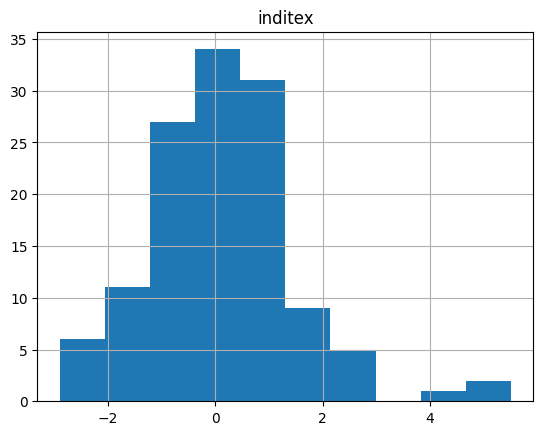

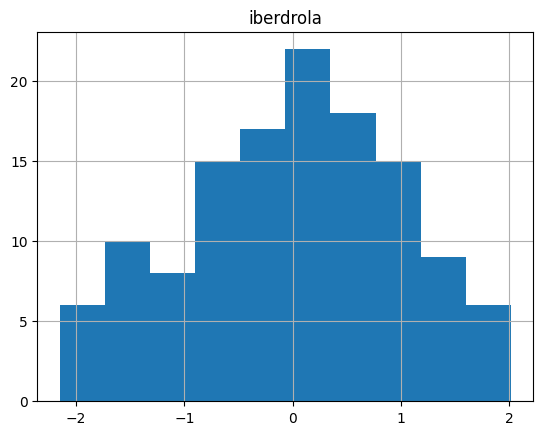

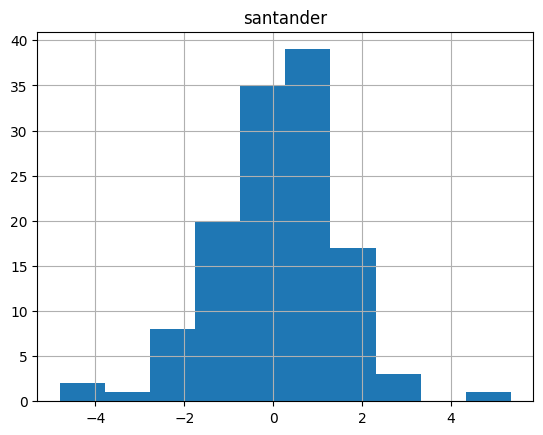

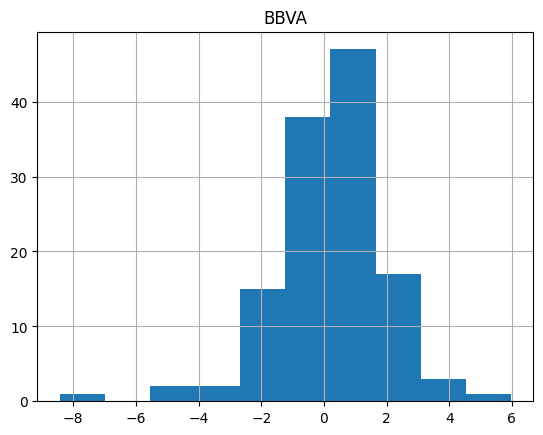

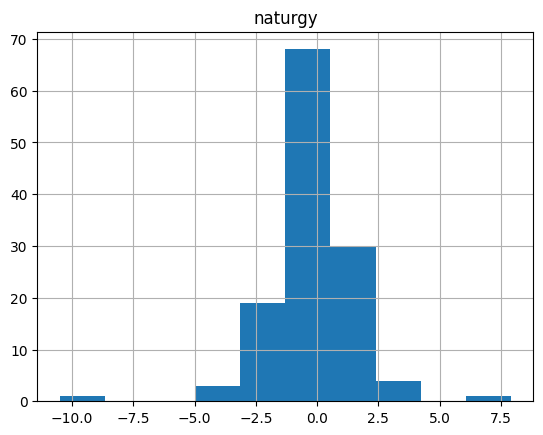

In [ ]:
import matplotlib.pyplot as plt
for valor in valores:
  roi2[valor].hist()
  plt.title(valor)
  plt.show()

Los boxplots dan otra perspectiva

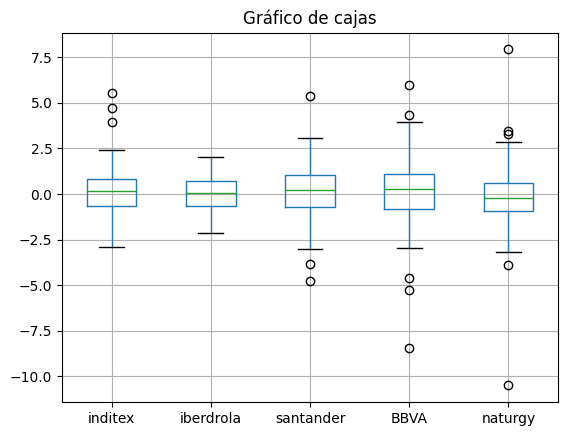

In [ ]:
import matplotlib.pyplot as plt
roi2.boxplot()
plt.title("Gráfico de cajas")
plt.savefig("boxplot.pdf",dpi=300)


<Axes: xlabel='Date'>

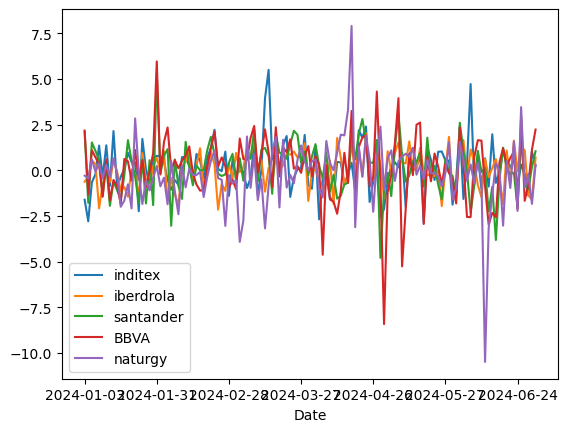

In [ ]:
roi2.plot()

uff...no se ve nada...ajustemos un poco el gráfico

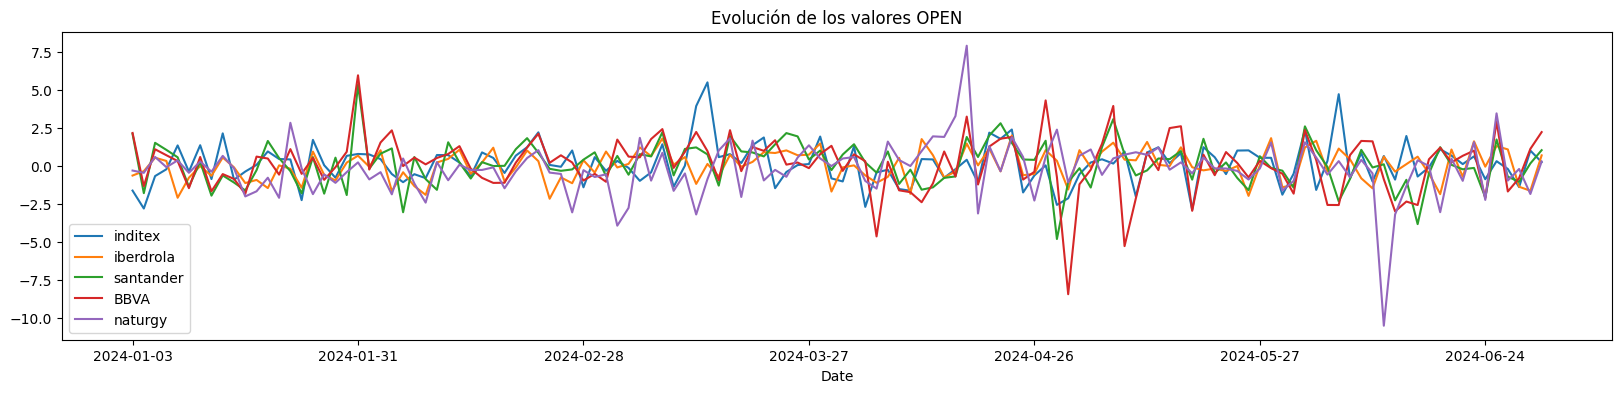

In [ ]:
ax = roi2.plot(figsize=(20, 4), title='Evolución de los valores OPEN')
# Configurar etiquetas del eje X para mostrar 1 de cada 5 fechas

print("")

¿No se vería mejor con la media móvil?

In [ ]:
# Calcular la media móvil de 5 días
rolling_average = roi2[valores].rolling(window=5).mean()
rolling_average

,inditex,iberdrola,santander,BBVA,naturgy
Date,,,,,
2024-01-03,NaN,NaN,NaN,NaN,NaN
2024-01-04,NaN,NaN,NaN,NaN,NaN
2024-01-05,NaN,NaN,NaN,NaN,NaN
2024-01-08,NaN,NaN,NaN,NaN,NaN
2024-01-09,-0.784240,-0.432773,0.698632,0.598482,0.030394
...,...,...,...,...,...
2024-06-25,0.181123,0.656123,-0.114236,0.546399,0.465052
2024-06-26,0.005578,0.657263,-0.270018,0.164110,0.176094
2024-06-27,-0.296878,0.525606,-0.434421,-0.129663,0.332036


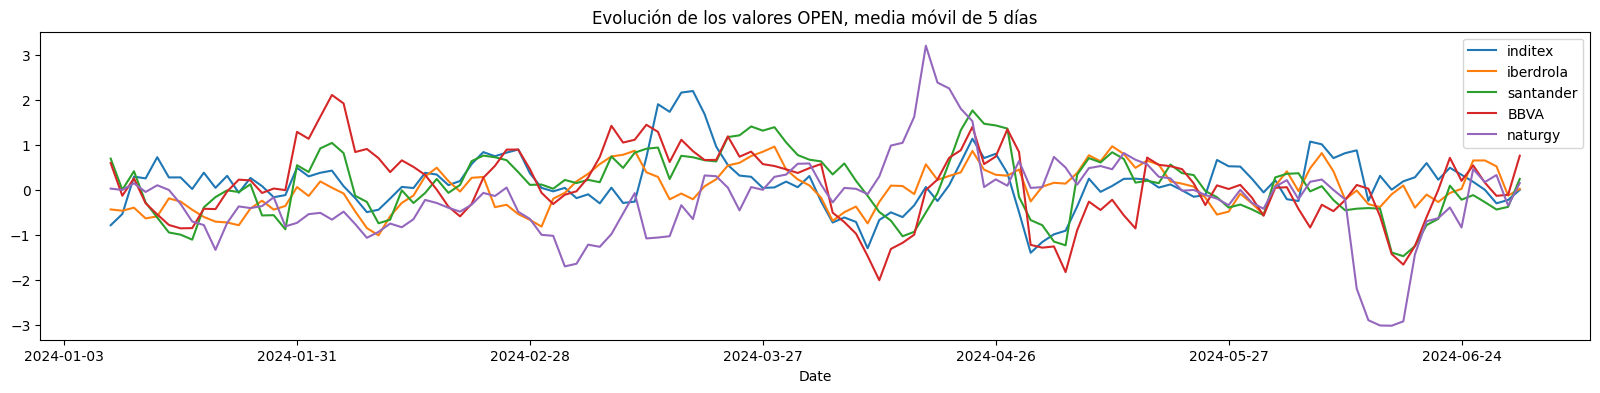

In [ ]:
ax = rolling_average.plot(figsize=(20, 4), title='Evolución de los valores OPEN, media móvil de 5 días')

print("")

Puede ser que nos interese ver un día concreto en forma de barras:

<Axes: xlabel='Date'>

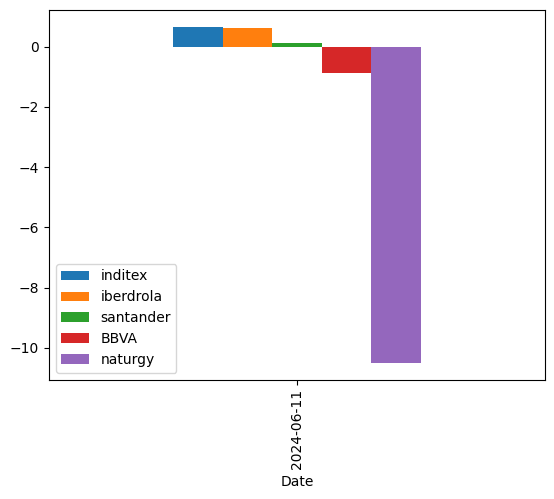

In [ ]:
roi2.loc[["2024-06-11"]].plot.bar()

<Axes: xlabel='Date'>

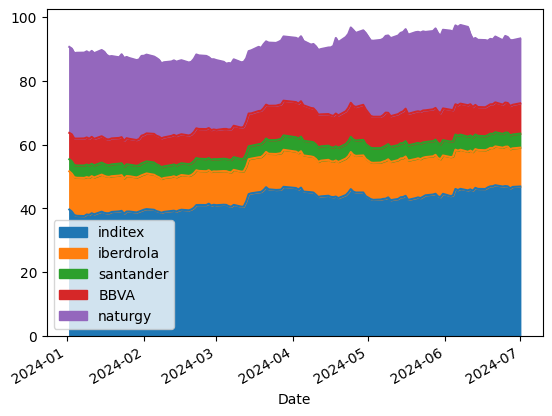

In [ ]:
open_data.plot.area()

<Axes: ylabel='Density'>

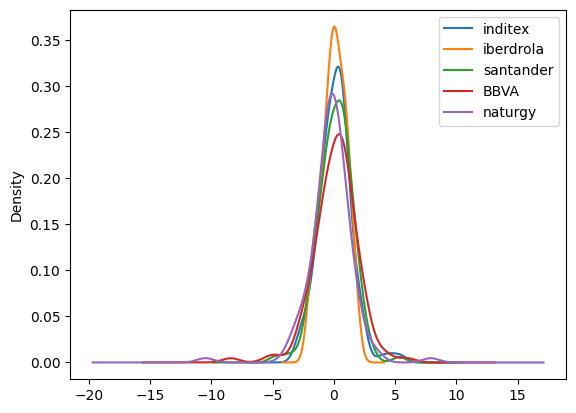

In [ ]:
roi2.plot.kde() # diagrama de densidad

<Axes: xlabel='santander', ylabel='BBVA'>

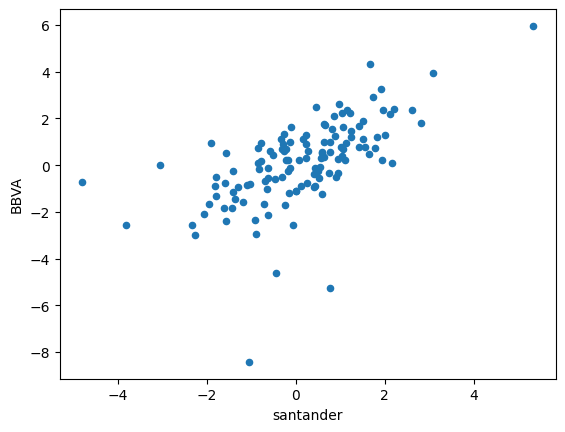

In [ ]:
roi2.plot.scatter("santander","BBVA")

<Axes: xlabel='santander', ylabel='inditex'>

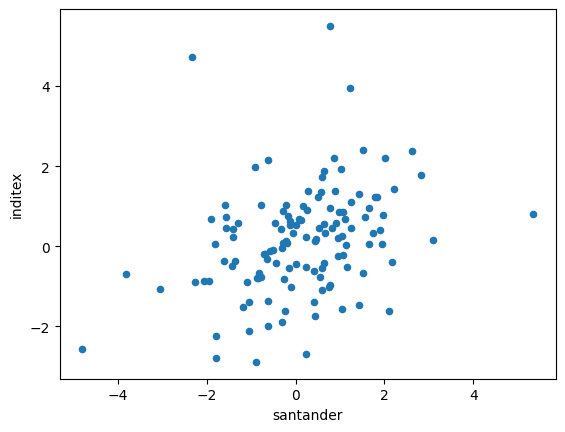

In [ ]:
roi2.plot.scatter(x="santander",y="inditex")

In [ ]:
roi2[valores].corr().style.background_gradient(cmap='RdYlGn')

,inditex,iberdrola,santander,BBVA,naturgy
inditex,1.000000,0.256283,0.319126,0.292242,0.039354
iberdrola,0.256283,1.000000,0.254728,0.238061,0.350610
santander,0.319126,0.254728,1.000000,0.621848,0.096750
BBVA,0.292242,0.238061,0.621848,1.000000,0.206436
naturgy,0.039354,0.350610,0.096750,0.206436,1.000000


Hay muchos más diagramas, ver aquí: https://pandas.pydata.org/docs/user_guide/visualization.html


#### Filtros

**Ejercicio**

En qué día tuvo naturgy su mayor decremento porcentual con respecto al día anterior (el valor mínimo en `roi2`)